In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc, precision_recall_curve
from sklearn.pipeline import Pipeline

In [3]:
df = pd.read_csv('/Users/luwei/Desktop/bikes_sharing.csv')

In [4]:
df

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129


In [5]:
print(df.head())

              datetime  season  holiday  workingday  weather  temp   atemp  \
0  2011-01-01 00:00:00       1        0           0        1  9.84  14.395   
1  2011-01-01 01:00:00       1        0           0        1  9.02  13.635   
2  2011-01-01 02:00:00       1        0           0        1  9.02  13.635   
3  2011-01-01 03:00:00       1        0           0        1  9.84  14.395   
4  2011-01-01 04:00:00       1        0           0        1  9.84  14.395   

   humidity  windspeed  casual  registered  count  
0        81        0.0       3          13     16  
1        80        0.0       8          32     40  
2        80        0.0       5          27     32  
3        75        0.0       3          10     13  
4        75        0.0       0           1      1  


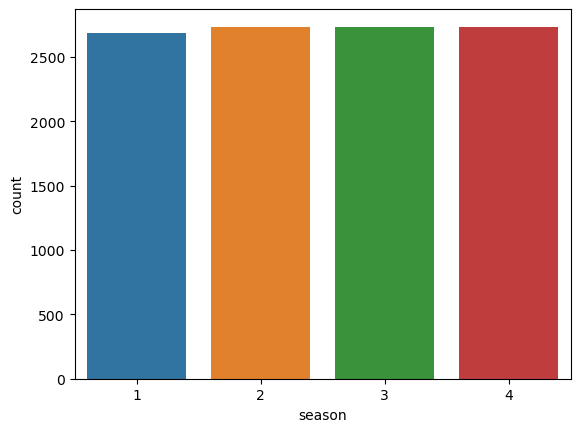

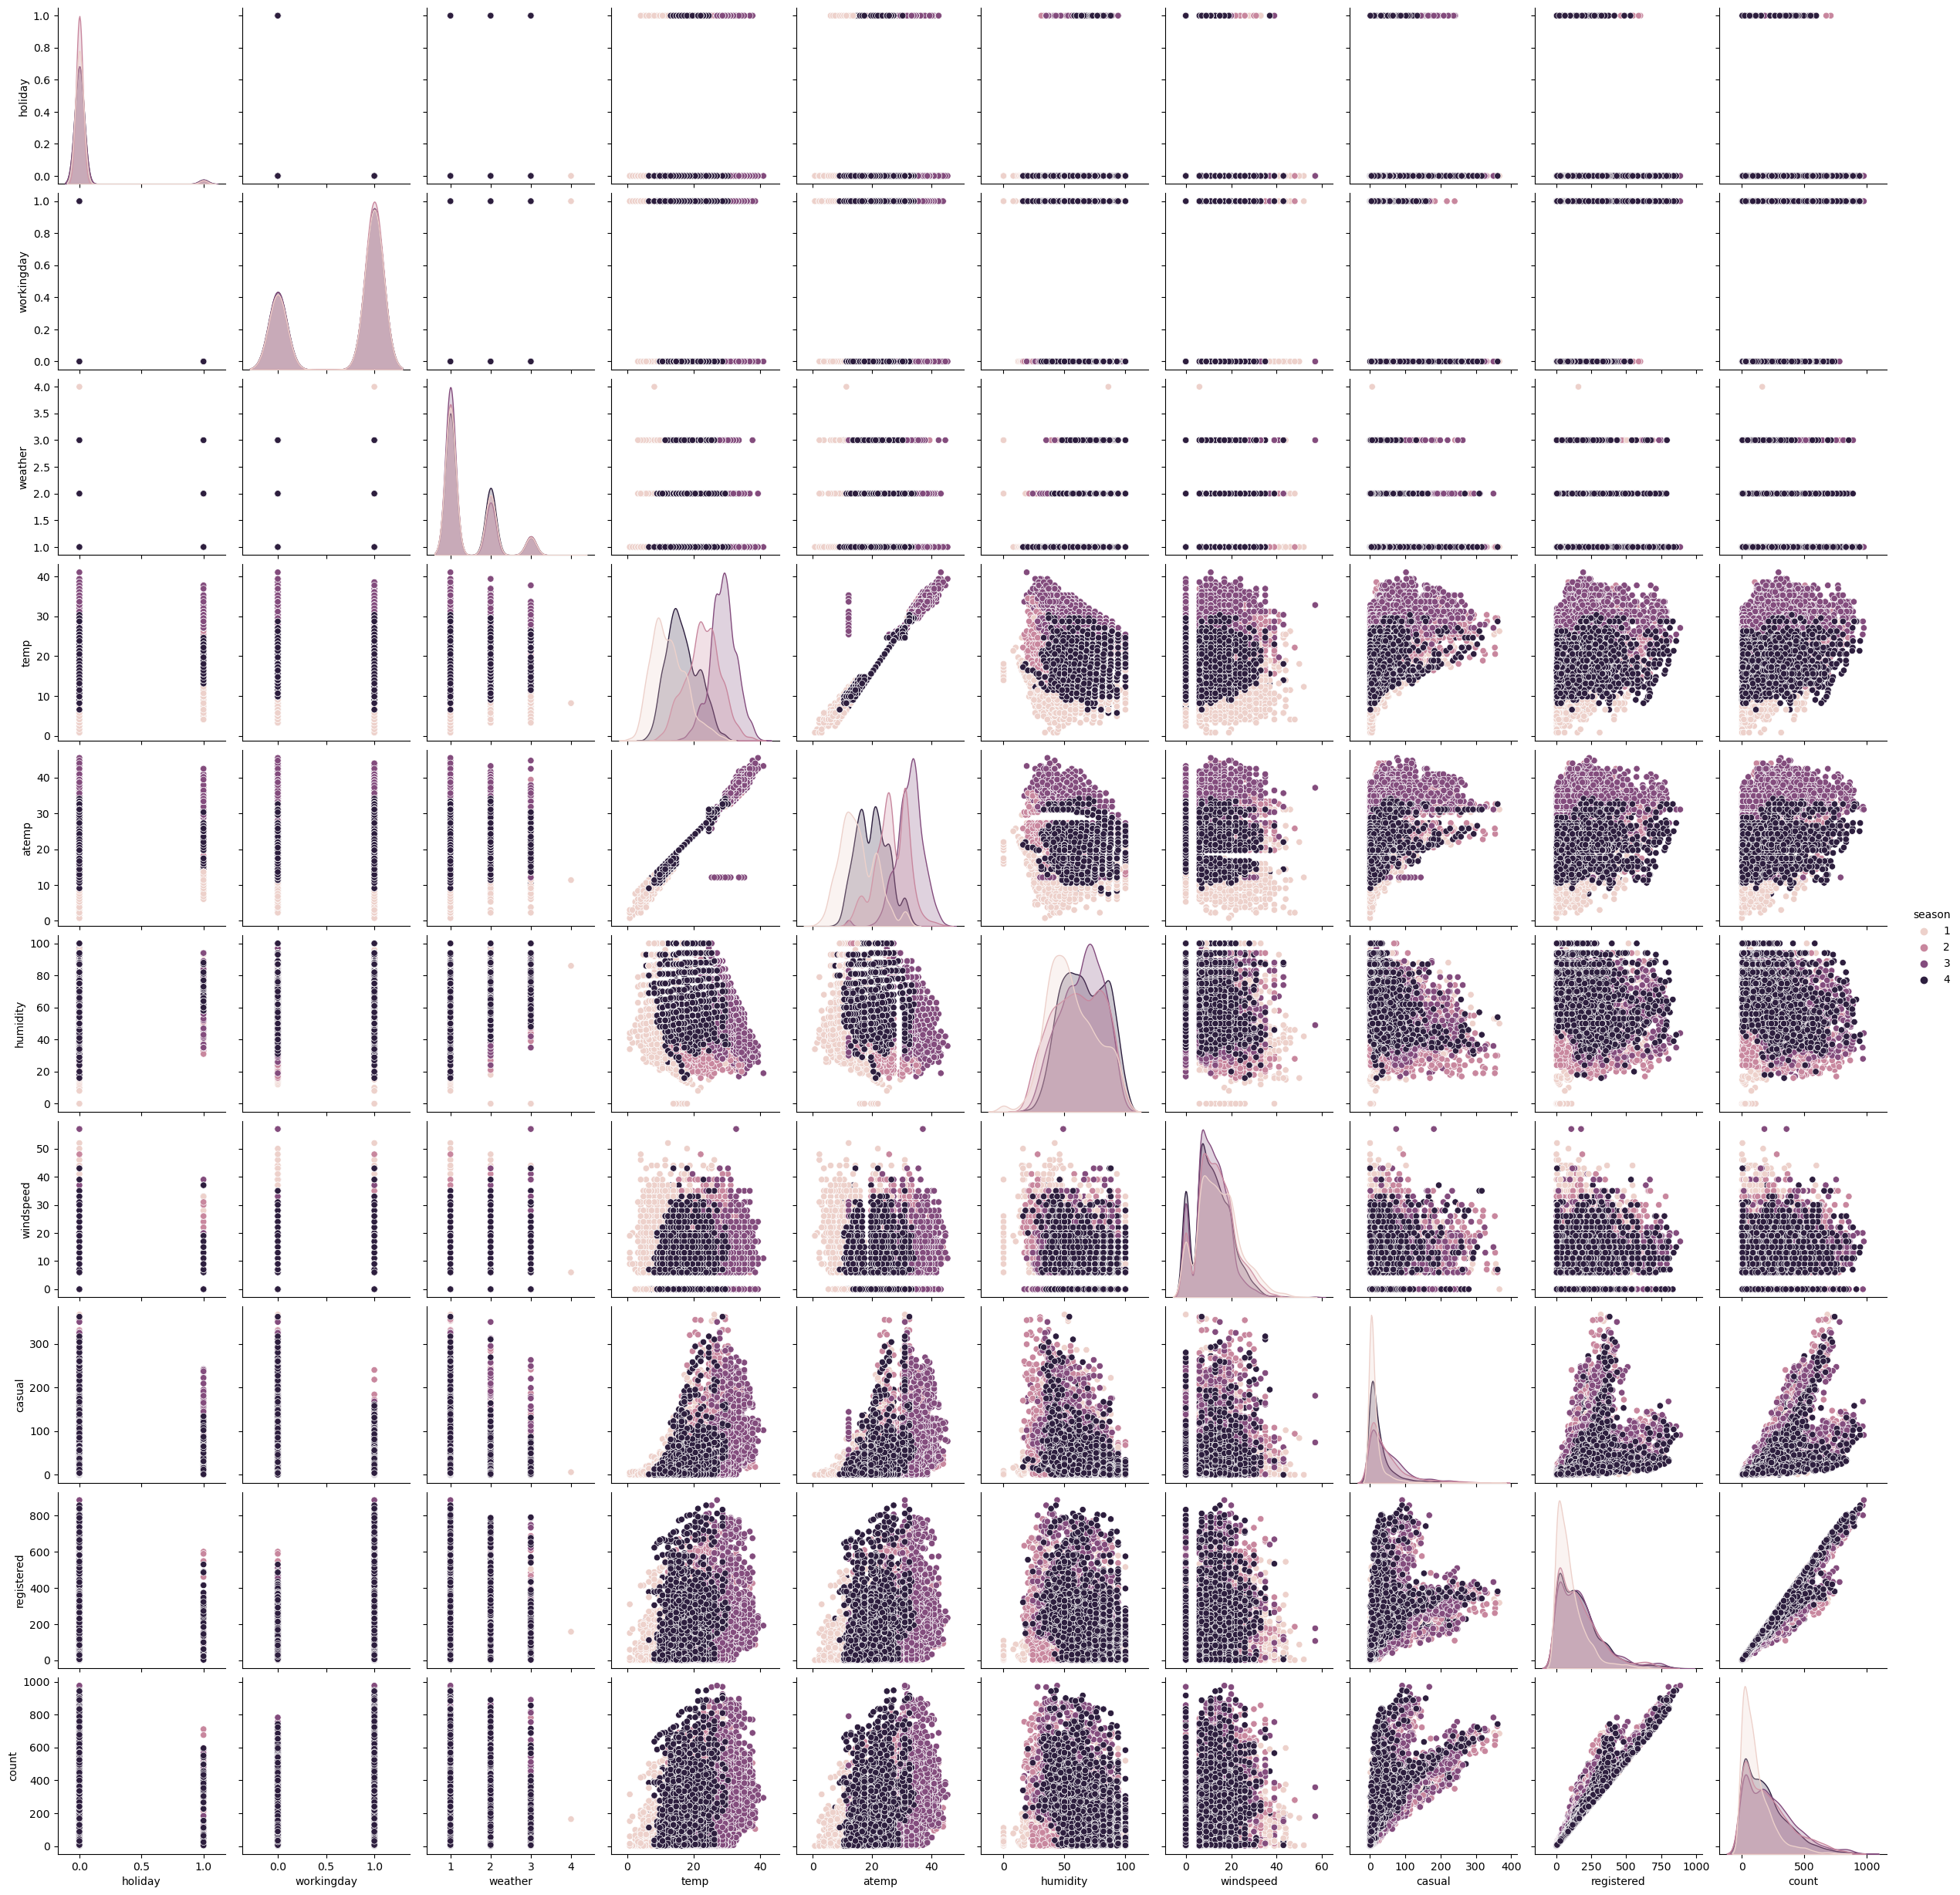

In [9]:
sns.countplot(x='season', data=df)
plt.show()
sns.pairplot(df, hue='season')
plt.show()


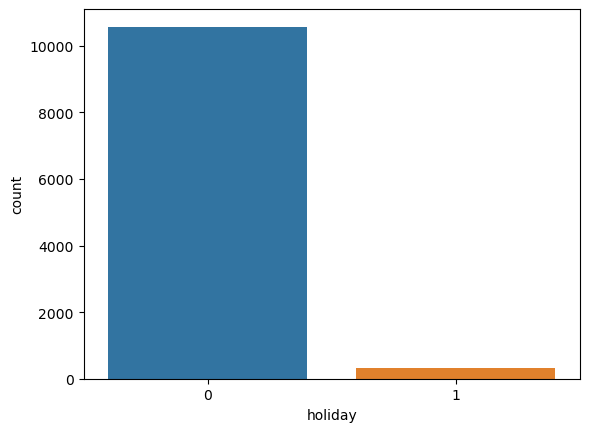

In [7]:
sns.countplot(x='holiday', data=df)
plt.show()


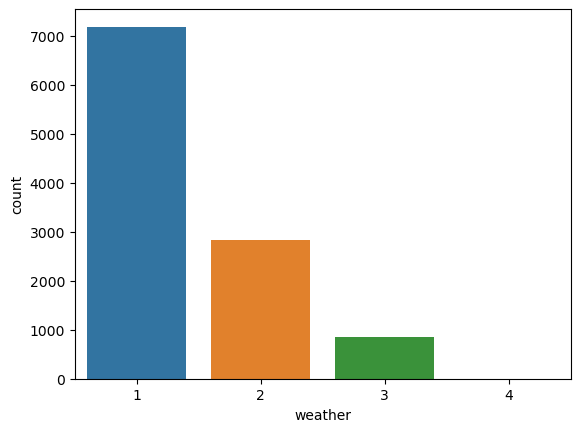

In [8]:
sns.countplot(x='weather', data=df)
plt.show()


<Axes: xlabel='windspeed', ylabel='Count'>

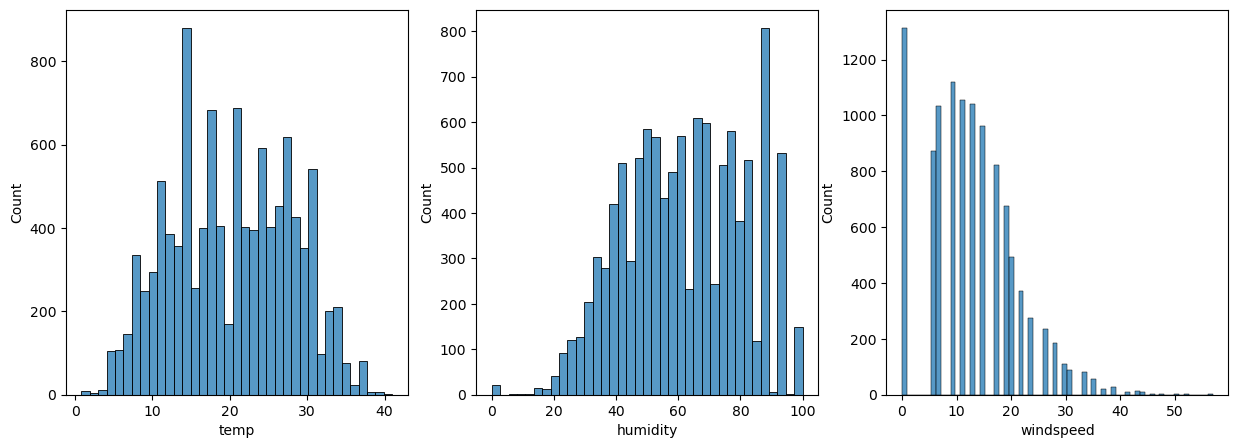

In [10]:
import matplotlib.pyplot as plt

fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(15,5))
sns.histplot(df['temp'], ax=ax1)
sns.histplot(df['humidity'], ax=ax2)
sns.histplot(df['windspeed'], ax=ax3)

<Axes: xlabel='weather', ylabel='windspeed'>

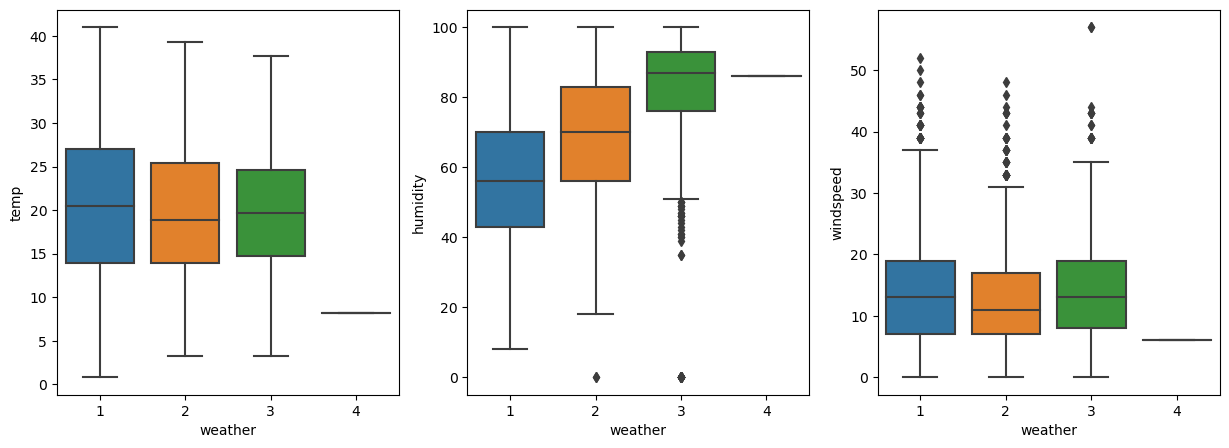

In [11]:
fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(15,5))
sns.boxplot(x='weather',y='temp', data=df, ax=ax1)
sns.boxplot(x='weather',y='humidity',data=df, ax=ax2)
sns.boxplot(x='weather',y='windspeed', data=df, ax=ax3)
#initial hypothesis temp and humidity can be strong predictors of bikes performance in weather

In [12]:
df.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count'],
      dtype='object')

In [15]:
df.groupby(['season','weather'])['registered'].count().unstack()

weather,1,2,3,4
season,,,,
1,1759.0,715.0,211.0,1.0
2,1801.0,708.0,224.0,NaN
3,1930.0,604.0,199.0,NaN
4,1702.0,807.0,225.0,NaN


In [17]:
df.groupby(['workingday','weather'])['registered'].count().unstack()

weather,1,2,3,4
workingday,,,,
0,2353.0,897.0,224.0,NaN
1,4839.0,1937.0,635.0,1.0


In [ ]:
#一同get dummy的操作

In [19]:
df.dropna(inplace=True)